In [18]:
# تثبيت مكتبة TensorFlow إذا لم تكن مثبتة
!pip install tensorflow

# استيراد المكتبات
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [19]:
# قراءة البيانات من الملف
df = pd.read_csv('/content/synthetic_dataset.csv')  # أو اسم الملف الذي رفعته

# عرض أول صفوف
df.head()

# اختيار الأعمدة المهمة
df = df[['Price', 'Discount', 'Stock']]

# تحويل القيم النصية في 'Stock' إلى أرقام
df['Stock'] = df['Stock'].replace(['In Stock', 'Out of Stock', 'Unknown'], [1, 0, -1])

# حذف القيم المفقودة
df.dropna(inplace=True)


<ipython-input-19-c75ecafc922b>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stock'] = df['Stock'].replace(['In Stock', 'Out of Stock', 'Unknown'], [1, 0, -1])


In [20]:
X = df[['Price', 'Discount']]
y = df['Stock']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# توحيد البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba") or isinstance(model, LinearRegression):
        y_pred = np.round(y_pred)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
evaluate_model(dt, "Decision Tree")



=== Decision Tree ===
Accuracy: 0.5028571428571429
              precision    recall  f1-score   support

         0.0       0.50      0.46      0.48       262
         1.0       0.50      0.55      0.52       263

    accuracy                           0.50       525
   macro avg       0.50      0.50      0.50       525
weighted avg       0.50      0.50      0.50       525



In [23]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
evaluate_model(rf, "Random Forest")



=== Random Forest ===
Accuracy: 0.518095238095238
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51       262
         1.0       0.52      0.53      0.53       263

    accuracy                           0.52       525
   macro avg       0.52      0.52      0.52       525
weighted avg       0.52      0.52      0.52       525



In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
evaluate_model(knn, "KNN")



=== KNN ===
Accuracy: 0.5104761904761905
              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51       262
         1.0       0.51      0.51      0.51       263

    accuracy                           0.51       525
   macro avg       0.51      0.51      0.51       525
weighted avg       0.51      0.51      0.51       525



In [27]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
evaluate_model(nb, "Naive Bayes")



=== Naive Bayes ===
Accuracy: 0.5028571428571429
              precision    recall  f1-score   support

         0.0       0.51      0.08      0.13       262
         1.0       0.50      0.93      0.65       263

    accuracy                           0.50       525
   macro avg       0.51      0.50      0.39       525
weighted avg       0.51      0.50      0.39       525



In [28]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
evaluate_model(svm, "SVM")



=== SVM ===
Accuracy: 0.5142857142857142
              precision    recall  f1-score   support

         0.0       0.53      0.25      0.34       262
         1.0       0.51      0.78      0.62       263

    accuracy                           0.51       525
   macro avg       0.52      0.51      0.48       525
weighted avg       0.52      0.51      0.48       525



In [29]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
evaluate_model(lr, "Linear Regression")



=== Linear Regression ===
Accuracy: 0.5009523809523809
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       262
         1.0       0.50      1.00      0.67       263

    accuracy                           0.50       525
   macro avg       0.25      0.50      0.33       525
weighted avg       0.25      0.50      0.33       525



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
ann = Sequential()
ann.add(Dense(16, input_dim=2, activation='relu'))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(1, activation='linear'))  # للإخراج العددي

ann.compile(loss='mean_squared_error', optimizer='adam')
ann.fit(X_train_scaled, y_train, epochs=50, verbose=0)

# توقعات
y_pred_ann = ann.predict(X_test_scaled)
y_pred_ann = np.round(y_pred_ann).flatten()
print("\n=== ANN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

=== ANN ===
Accuracy: 0.4990476190476191
              precision    recall  f1-score   support

         0.0       0.50      0.42      0.46       262
         1.0       0.50      0.57      0.53       263

    accuracy                           0.50       525
   macro avg       0.50      0.50      0.50       525
weighted avg       0.50      0.50      0.50       525



In [34]:
import os

os.makedirs('/content/Data/Result', exist_ok=True)

# نموذج Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# توقعات
y_pred_linear = np.round(lr.predict(X_test_scaled))

# حفظ جميع النتائج
pd.DataFrame(y_test).to_csv('/content/Data/Result/y_test.csv', index=False)
pd.DataFrame(y_pred_ann).to_csv('/content/Data/Result/y_pred_ann.csv', index=False)
pd.DataFrame(y_pred_linear.reshape(-1,1)).to_csv('/content/Data/Result/y_pred_linear.csv', index=False)


In [36]:


# 1. حفظ y_test (القيم الحقيقية)
pd.DataFrame(y_test).to_csv('/content/Data/Result/y_test.csv', index=False)

# 2. توقعات ANN (تم حسابها مسبقاً في y_pred_ann)
pd.DataFrame(y_pred_ann).to_csv('/content/Data/Result/y_pred_ann.csv', index=False)

# 3. Linear Regression
y_pred_linear = np.round(lr.predict(X_test_scaled))
pd.DataFrame(y_pred_linear).to_csv('/content/Data/Result/y_pred_linear.csv', index=False)

# 4. Decision Tree
y_pred_dt = dt.predict(X_test_scaled)
pd.DataFrame(y_pred_dt).to_csv('/content/Data/Result/y_pred_dt.csv', index=False)

# 5. Random Forest
y_pred_rf = rf.predict(X_test_scaled)
pd.DataFrame(y_pred_rf).to_csv('/content/Data/Result/y_pred_rf.csv', index=False)

# 6. Naive Bayes
y_pred_nb = nb.predict(X_test_scaled)
pd.DataFrame(y_pred_nb).to_csv('/content/Data/Result/y_pred_nb.csv', index=False)

# 7. KNN
y_pred_knn = knn.predict(X_test_scaled)
pd.DataFrame(y_pred_knn).to_csv('/content/Data/Result/y_pred_knn.csv', index=False)

# 8. SVM
y_pred_svm = svm.predict(X_test_scaled)
pd.DataFrame(y_pred_svm).to_csv('/content/Data/Result/y_pred_svm.csv', index=False)


In [37]:
# إنشاء جدول بالدقة لكل نموذج
model_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Linear Regression', 'ANN'],
    'Accuracy': [
        accuracy_score(y_test, dt.predict(X_test_scaled)),
        accuracy_score(y_test, rf.predict(X_test_scaled)),
        accuracy_score(y_test, knn.predict(X_test_scaled)),
        accuracy_score(y_test, nb.predict(X_test_scaled)),
        accuracy_score(y_test, svm.predict(X_test_scaled)),
        accuracy_score(y_test, np.round(lr.predict(X_test_scaled))),
        accuracy_score(y_test, y_pred_ann)
    ]
})

# عرض النتائج
print(model_results)


               Model  Accuracy
0      Decision Tree  0.502857
1      Random Forest  0.518095
2                KNN  0.510476
3        Naive Bayes  0.502857
4                SVM  0.514286
5  Linear Regression  0.500952
6                ANN  0.499048


In [38]:
# حفظ النتائج إلى ملف CSV داخل مجلد Result
model_results.to_csv('/content/Data/Result/model_accuracy_results.csv', index=False)


In [39]:
# إنشاء جدول بالدقة لكل نموذج
model_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Linear Regression', 'ANN'],
    'Accuracy': [
        accuracy_score(y_test, dt.predict(X_test_scaled)),
        accuracy_score(y_test, rf.predict(X_test_scaled)),
        accuracy_score(y_test, knn.predict(X_test_scaled)),
        accuracy_score(y_test, nb.predict(X_test_scaled)),
        accuracy_score(y_test, svm.predict(X_test_scaled)),
        accuracy_score(y_test, np.round(lr.predict(X_test_scaled))),
        accuracy_score(y_test, y_pred_ann)
    ]
})

# عرض النتائج
print(model_results)


               Model  Accuracy
0      Decision Tree  0.502857
1      Random Forest  0.518095
2                KNN  0.510476
3        Naive Bayes  0.502857
4                SVM  0.514286
5  Linear Regression  0.500952
6                ANN  0.499048


In [40]:
# حفظ النتائج إلى ملف CSV داخل مجلد Result
model_results.to_csv('/content/Data/Result/model_accuracy_results.csv', index=False)


In [41]:
import pandas as pd
import numpy as np

# توقعات لكل نموذج
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_nb = nb.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_lr = np.round(lr.predict(X_test_scaled))  # تقريب القيم المستمرة
# توقعات الشبكة العصبية موجودة مسبقاً: y_pred_ann

# حفظ التوقعات في ملفات CSV داخل مجلد Result
pd.DataFrame(y_pred_dt).to_csv('/content/Data/Result/y_pred_dt.csv', index=False)
pd.DataFrame(y_pred_rf).to_csv('/content/Data/Result/y_pred_rf.csv', index=False)
pd.DataFrame(y_pred_knn).to_csv('/content/Data/Result/y_pred_knn.csv', index=False)
pd.DataFrame(y_pred_nb).to_csv('/content/Data/Result/y_pred_nb.csv', index=False)
pd.DataFrame(y_pred_svm).to_csv('/content/Data/Result/y_pred_svm.csv', index=False)
pd.DataFrame(y_pred_lr).to_csv('/content/Data/Result/y_pred_lr.csv', index=False)
pd.DataFrame(y_pred_ann).to_csv('/content/Data/Result/y_pred_ann.csv', index=False)

# وأخيراً، نحفظ بيانات y_test الحقيقية للمقارنة
pd.DataFrame(y_test).to_csv('/content/Data/Result/y_test.csv', index=False)


In [42]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

# إنشاء DataFrame لعرض دقة النماذج
model_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Linear Regression', 'ANN'],
    'Accuracy': [
        accuracy_score(y_test, dt.predict(X_test_scaled)),
        accuracy_score(y_test, rf.predict(X_test_scaled)),
        accuracy_score(y_test, knn.predict(X_test_scaled)),
        accuracy_score(y_test, nb.predict(X_test_scaled)),
        accuracy_score(y_test, svm.predict(X_test_scaled)),
        accuracy_score(y_test, np.round(lr.predict(X_test_scaled))),
        accuracy_score(y_test, y_pred_ann)
    ]
})

# عرض النتائج
print(model_results)


               Model  Accuracy
0      Decision Tree  0.502857
1      Random Forest  0.518095
2                KNN  0.510476
3        Naive Bayes  0.502857
4                SVM  0.514286
5  Linear Regression  0.500952
6                ANN  0.499048


<ipython-input-43-95f93bcc86b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_results, x='Model', y='Accuracy', palette='viridis')


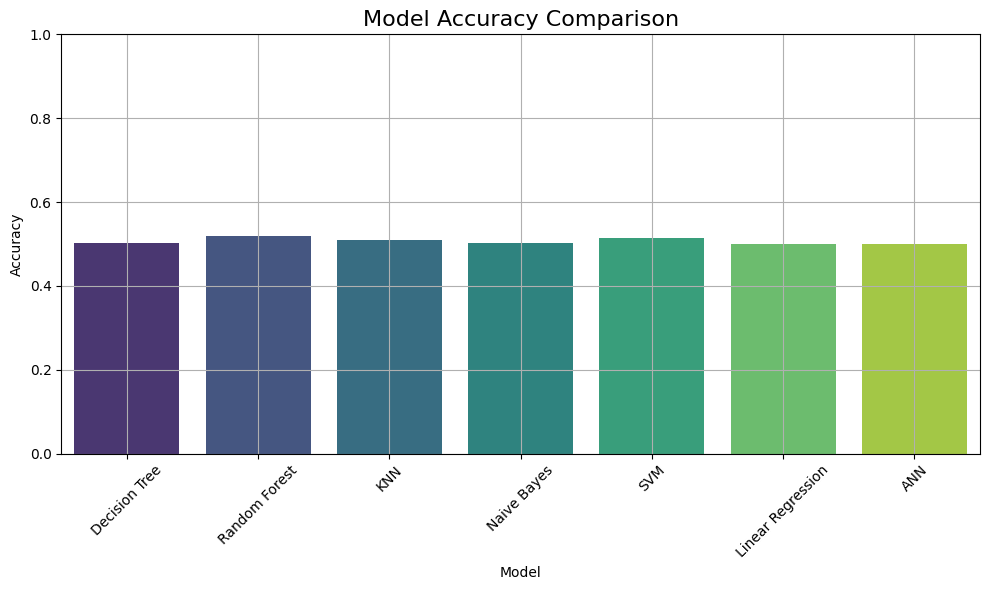

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# ضبط حجم الرسم
plt.figure(figsize=(10,6))
sns.barplot(data=model_results, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-44-3bd82a29c442>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_results, x='Model', y='Accuracy', palette='viridis')


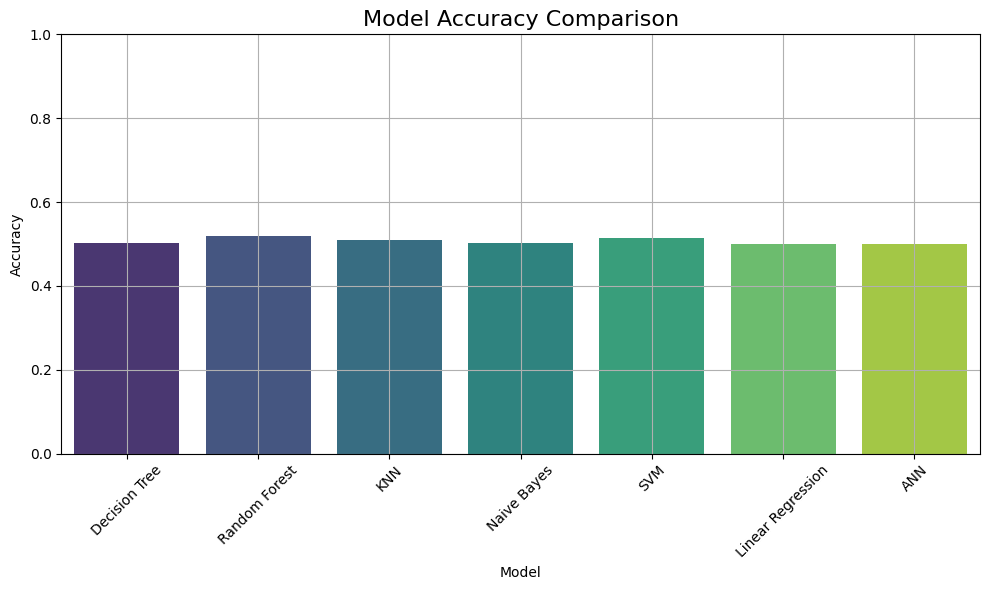

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=model_results, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/Data/Result/model_accuracy_plot.png')  # حفظ الصورة في مجلد النتائج
plt.show()


In [45]:
# حفظ جدول المقارنة في ملف CSV داخل مجلد Result
model_results.to_csv('/content/Data/Result/model_accuracy_results.csv', index=False)


In [46]:
from sklearn.metrics import classification_report

# إنشاء مجلد النتائج إذا لم يكن موجوداً (احترازي)
import os
os.makedirs('/content/Data/Result', exist_ok=True)

# قائمة النماذج والتوقعات الخاصة بها
model_reports = {
    "decision_tree": dt.predict(X_test_scaled),
    "random_forest": rf.predict(X_test_scaled),
    "knn": knn.predict(X_test_scaled),
    "naive_bayes": nb.predict(X_test_scaled),
    "svm": svm.predict(X_test_scaled),
    "linear_regression": np.round(lr.predict(X_test_scaled)),
    "ann": y_pred_ann  # هذا موجود مسبقًا
}

# حفظ تقارير التصنيف في ملفات .txt
for model_name, predictions in model_reports.items():
    report = classification_report(y_test, predictions)
    with open(f"/content/Data/Result/{model_name}_report.txt", "w") as file:
        file.write(report)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


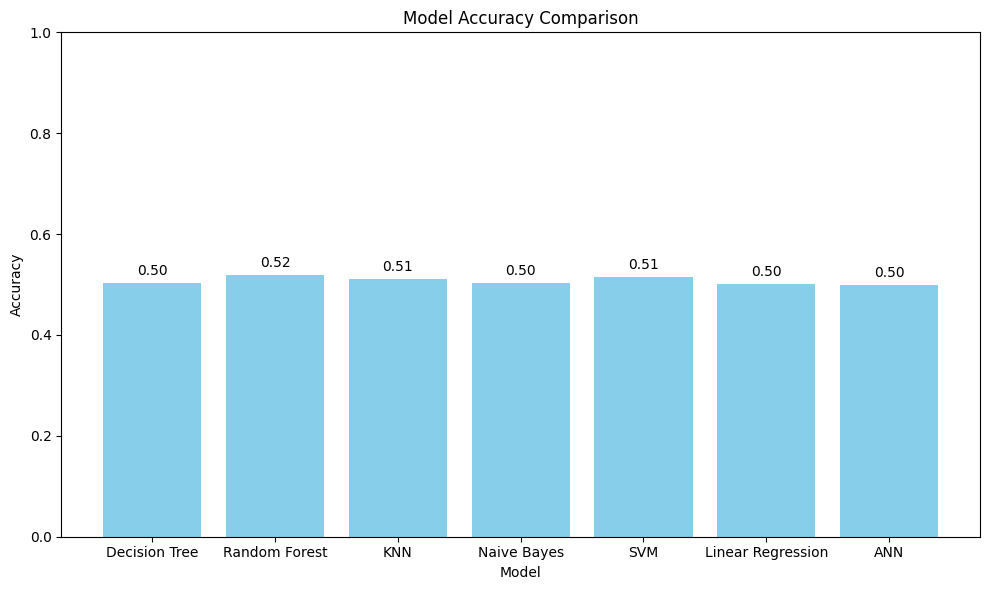

In [47]:
import matplotlib.pyplot as plt

# قائمة النماذج والدقة الخاصة بكل نموذج (من model_results)
models = model_results['Model']
accuracies = model_results['Accuracy']

# إعداد الرسم البياني
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

# إضافة القيم فوق الأعمدة
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}",
             ha='center', va='bottom')

# حفظ الصورة في مجلد النتائج
plt.tight_layout()
plt.savefig('/content/Data/Result/model_accuracy_plot.png')
plt.show()


In [48]:
# حفظ بيانات التدريب (السمات فقط)
pd.DataFrame(X_train_scaled, columns=['Price', 'Discount']).to_csv('/content/Data/x.csv', index=False)

# حفظ بيانات الاختبار (السمات فقط)
pd.DataFrame(X_test_scaled, columns=['Price', 'Discount']).to_csv('/content/Data/x_test.csv', index=False)


In [49]:
# حفظ الهدف (الـ labels) للتدريب
pd.DataFrame(y_train).to_csv('/content/Data/y.csv', index=False)

# حفظ الهدف للاختبار
pd.DataFrame(y_test).to_csv('/content/Data/y_test.csv', index=False)


In [50]:
import os
import pandas as pd

# إنشاء المجلد إذا لم يكن موجود
os.makedirs('/content/preprocessed_data', exist_ok=True)

# حفظ بيانات التدريب (السمات)
pd.DataFrame(X_train_scaled, columns=['Price', 'Discount']).to_csv('/content/preprocessed_data/x.csv', index=False)

# حفظ بيانات الاختبار (السمات)
pd.DataFrame(X_test_scaled, columns=['Price', 'Discount']).to_csv('/content/preprocessed_data/x_test.csv', index=False)

# حفظ الهدف (الـ labels) للتدريب
pd.DataFrame(y_train).to_csv('/content/preprocessed_data/y.csv', index=False)

# حفظ الهدف للاختبار
pd.DataFrame(y_test).to_csv('/content/preprocessed_data/y_test.csv', index=False)


In [51]:
import shutil

# ضغط المجلد إلى ملف zip
shutil.make_archive('/content/preprocessed_data', 'zip', '/content/preprocessed_data')


'/content/preprocessed_data.zip'

In [52]:
import shutil

# ضغط مجلد النتائج
shutil.make_archive('/content/Data/Result', 'zip', '/content/Data/Result')


'/content/Data/Result.zip'

In [53]:
import pandas as pd

# حفظ ملفات البيانات المعالجة (preprocessed data)
pd.DataFrame(X).to_csv('/content/x.csv', index=False)
pd.DataFrame(X_test).to_csv('/content/x_test.csv', index=False)
pd.DataFrame(y).to_csv('/content/y.csv', index=False)
pd.DataFrame(y_test).to_csv('/content/y_test.csv', index=False)



In [54]:
import os
import shutil

base_dir = '/content/github'

# إنشاء مجلد preprocessed_data
preprocessed_data_dir = os.path.join(base_dir, 'data', 'preprocessed_data')
os.makedirs(preprocessed_data_dir, exist_ok=True)

# نسخ الملفات
shutil.copy('/content/x.csv', preprocessed_data_dir)
shutil.copy('/content/x_test.csv', preprocessed_data_dir)
shutil.copy('/content/y.csv', preprocessed_data_dir)
shutil.copy('/content/y_test.csv', preprocessed_data_dir)


'/content/github/data/preprocessed_data/y_test.csv'

In [55]:
import pandas as pd

# حفظ توقعات النماذج
pd.DataFrame(y_pred_dt).to_csv('/content/y_pred_dt.csv', index=False)      # Decision Tree
pd.DataFrame(y_pred_rf).to_csv('/content/y_pred_rf.csv', index=False)      # Random Forest
pd.DataFrame(y_pred_knn).to_csv('/content/y_pred_knn.csv', index=False)    # KNN
pd.DataFrame(y_pred_nb).to_csv('/content/y_pred_nb.csv', index=False)      # Naive Bayes
pd.DataFrame(y_pred_svm).to_csv('/content/y_pred_svm.csv', index=False)    # SVM
pd.DataFrame(y_pred_linear).to_csv('/content/y_pred_linear.csv', index=False)  # Linear Regression
pd.DataFrame(y_pred_ann).to_csv('/content/y_pred_ann.csv', index=False)    # ANN



In [56]:
# مسار مجلد Results داخل مجلد github
results_dir = os.path.join(base_dir, 'Results')
os.makedirs(results_dir, exist_ok=True)

# نسخ ملفات التوقعات
model_preds = {
    'predictions_DecisionTree.csv': '/content/y_pred_dt.csv',
    'predictions_RandomForest.csv': '/content/y_pred_rf.csv',
    'predictions_KNN.csv': '/content/y_pred_knn.csv',
    'predictions_NaiveBayes.csv': '/content/y_pred_nb.csv',
    'predictions_SVM.csv': '/content/y_pred_svm.csv',
    'predictions_LinearRegression.csv': '/content/y_pred_linear.csv',
    'predictions_ANN.csv': '/content/y_pred_ann.csv',
}
for filename, path in model_preds.items():
    shutil.copy(path, os.path.join(results_dir, filename))


In [57]:
import os
import shutil

# مسار ملف البيانات الأصلية الحالي
source_file = './synthetic_dataset.csv'  # عدل المسار إذا مختلف

# إنشاء مجلد github/original data إذا لم يكن موجوداً
target_dir = './github/original data'
os.makedirs(target_dir, exist_ok=True)

# مسار الملف الجديد داخل المجلد
target_file = os.path.join(target_dir, 'synthetic_dataset.csv')

# نسخ الملف بدون تعديل
shutil.copy2(source_file, target_file)

print(f"تم نسخ البيانات الأصلية إلى: {target_file}")

تم نسخ البيانات الأصلية إلى: ./github/original data/synthetic_dataset.csv


In [58]:
import shutil
shutil.copytree('github', '/مسار/الحفظ/الذي/تريده/github')


'/مسار/الحفظ/الذي/تريده/github'

In [59]:
import shutil
from google.colab import files

# ضغط مجلد github إلى ملف zip باسم github_backup.zip
shutil.make_archive('github_backup', 'zip', 'github')

# تحميل الملف المضغوط إلى جهازك
files.download('github_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>